In [76]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

In [77]:
customer_acq=pd.read_csv("C:/Users/91971/Downloads/Python Foundation Case Study 2 - Credit Card Case Study/Customer Acqusition.csv")

In [78]:
customer_acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [79]:
customer_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [80]:
age = customer_acq["Age"].mean()

In [81]:
customer_acq.Age.mean()

46.49

In [82]:
age 

46.49

# Following are some of Mr. Watson’s questions to a Consultant (like you) to understand the 
customers spend & repayment behavior.
1. In the above dataset,
 a. In case age is less than 18, replace it with mean of age values.

In [83]:
#Q1(A)
customer_acq.loc[(customer_acq.Age<18),"Age"]=customer_acq.Age.mean()

In [84]:
customer_acq[customer_acq["Age"]==46.49]

,No,Customer,Age,City,Product,Limit,Company,Segment
13,14,A14,46.49,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,41,A41,46.49,COCHIN,Platimum,500000.0,C23,Govt
62,63,A63,46.49,BANGALORE,Gold,500000.0,C25,Self Employed
67,68,A68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,70,A70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed
89,90,A90,46.49,COCHIN,Gold,500000.0,C13,Govt


In [85]:
spend=pd.read_csv("C:/Users/91971/Downloads/Python Foundation Case Study 2 - Credit Card Case Study/spend.csv")

In [86]:
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [129]:
customer_spend = pd.merge(left=customer_acq,right=spend,on="Customer")

In [130]:
customer_spend 

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


Q1) b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
(customer’s limit provided in acquisition table is the per transaction limit on his card)


In [131]:
#Q1(b)
customer_spend["Amount"]=np.where(customer_spend.Amount>customer_spend.Limit,customer_spend.Limit/2,customer_spend.Amount)

In [132]:
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00


In [133]:
repayment=pd.read_csv("C:/Users/91971/Downloads/Python Foundation Case Study 2 - Credit Card Case Study/Repayment.csv")

In [134]:
repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [135]:
repayment.drop(['Unnamed: 4','SL No:'],axis=1,inplace=True)

In [136]:
repayment

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
...,...,...,...
1518,NaN,NaN,NaN
1519,NaN,NaN,NaN
1520,NaN,NaN,NaN
1521,NaN,NaN,NaN


In [137]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Amount    1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 35.8+ KB


In [138]:
repayment.dropna(axis=0,inplace=True)

In [139]:
repayment

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
...,...,...,...
1495,A67,9-May-05,55638.77
1496,A68,10-May-06,319836.49
1497,A69,11-Jul-06,247628.45
1498,A70,12-Aug-05,454016.51


In [140]:
customer_repayment = pd.merge(left=customer_acq,right=repayment,on="Customer")

In [141]:
customer_repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,310992.30
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,121874.90
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,337815.57
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,25682.73


Q1) c. Incase the repayment amount is more than the limit, replace the repayment with the 
limit.


In [142]:
#Q1(c)
customer_repayment["Amount"]=np.where(customer_repayment.Amount>customer_repayment.Limit,
                                      customer_repayment.Limit,customer_repayment.Amount)

In [143]:
customer_repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,100000.00
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,10000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,10001.00
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,10002.00


Q2. From the above dataset create the following summaries:

 a. How many distinct customers exist?

In [144]:
#Q2(A)
customer_acq["Customer"].drop_duplicates().count()

100

In [145]:
customer_acq["Customer"].nunique()

100

2. From the above dataset create the following summaries:
    
    
    b. How many distinct categories exist?

In [146]:
#Q2(b)
customer_acq["Product"].drop_duplicates()

0        Gold
1      Silver
2    Platimum
Name: Product, dtype: object

In [147]:
customer_acq["Product"].nunique()

3

2. From the above dataset create the following summaries:

    c. What is the average monthly spend by customers?
    

In [148]:
#Q2(C)
#changing date from object to date time
customer_spend["Month"]=customer_spend["Month"].apply(lambda x:pd.to_datetime(x))

In [149]:
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00


In [150]:
customer_spend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Age       1500 non-null   float64       
 3   City      1500 non-null   object        
 4   Product   1500 non-null   object        
 5   Limit     1500 non-null   float64       
 6   Company   1500 non-null   object        
 7   Segment   1500 non-null   object        
 8   Sl No:    1500 non-null   int64         
 9   Month     1500 non-null   datetime64[ns]
 10  Type      1500 non-null   object        
 11  Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 152.3+ KB


In [151]:
customer_spend.groupby(['Customer','Month'])[['Amount']].mean()

Amount
Customer Month                 
A1       2004-01-03  410556.130
         2004-01-12  463017.010
         2004-01-15   23740.460
         2004-01-25  439656.715
         2004-02-05   52208.650
...                         ...
A95      2004-01-15  240401.500
A96      2004-01-25   54729.660
A97      2004-01-12    5000.000
A98      2004-01-03    5000.500
A99      2004-01-15    5001.000

[1257 rows x 1 columns]

In [152]:
customer_spend["month_number"]=customer_spend["Month"].apply(lambda x:x.month)

In [153]:
customer_spend.tail(100)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,month_number
1400,61,A61,44.0,COCHIN,Gold,500000.0,C23,Govt,1045,2006-10-03,RENTAL,460195.99,10
1401,61,A61,44.0,COCHIN,Gold,500000.0,C23,Govt,1072,2006-04-01,RENTAL,129534.90,4
1402,61,A61,44.0,COCHIN,Gold,500000.0,C23,Govt,1074,2006-04-03,JEWELLERY,353502.17,4
1403,61,A61,44.0,COCHIN,Gold,500000.0,C23,Govt,1101,2005-02-23,RENTAL,330733.51,2
1404,61,A61,44.0,COCHIN,Gold,500000.0,C23,Govt,1103,2006-02-04,JEWELLERY,42791.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,1
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,1
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,1
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,1


In [154]:
customer_spend.groupby(['month_number','Customer'])[['Amount']].mean()

Amount
month_number Customer               
1            A1        372762.587143
             A10       161144.326667
             A100       50000.000000
             A11       130298.903333
             A12       343885.410000
...                              ...
12           A54       155708.160000
             A56       223628.270000
             A58        50001.000000
             A61        62914.030000
             A64       393513.710000

[578 rows x 1 columns]

2. From the above dataset create the following summaries:

    d. What is the average monthly repayment by customers?


In [155]:
#Q2(d)
#changing date from object to date time
customer_repayment["Month"]=customer_repayment["Month"].apply(lambda x:pd.to_datetime(x))

In [156]:
customer_repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00


In [157]:
customer_repayment["month_number"]=customer_repayment["Month"].apply(lambda x:x.month)

In [158]:
customer_repayment.groupby(['month_number','Customer'])[['Amount']].mean()

Amount
month_number Customer               
1            A1        343972.327143
             A10       272897.385000
             A100       69551.190000
             A11       319518.796667
             A12       203397.863333
...                              ...
12           A56       162103.090000
             A57       100001.000000
             A6         27398.180000
             A64       212614.480000
             A7        100001.000000

[558 rows x 1 columns]

Q2. From the above dataset create the following summaries

f. What are the top 5 product types?


In [159]:
#Q2(f)
customer_spend["Type"].value_counts().head(5)

PETRO           200
CAMERA          160
FOOD            160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

In [160]:
customer_spend.groupby(["Type"])[["Amount"]].sum().sort_values("Amount",ascending=False).head(5)

,Amount
Type,
PETRO,28597384.98
CAMERA,27690738.44
FOOD,20519243.60
AIR TICKET,20155847.12
TRAIN TICKET,19995825.72


 Q2. From the above dataset create the following summaries
 
 g. Which city is having maximum spend?

In [161]:
#Q2(g)
customer_spend.groupby(["City"])[["Amount"]].sum().sort_values("Amount",ascending=False)

,Amount
City,
COCHIN,45963513.50
CALCUTTA,41108132.30
BANGALORE,40461647.02
BOMBAY,28603127.38
CHENNAI,22128635.65
TRIVANDRUM,15337155.87
PATNA,15260586.97
DELHI,10918286.54


Q2. From the above dataset create the following summaries

h. Which age group is spending more money?

In [162]:
#Q2(h)
customer_spend["Age_Group"]=np.where(((customer_spend.Age.astype(int)>=18) & (customer_spend.Age.astype(int)<25)),"Youth",
                                     np.where(((customer_spend.Age.astype(int)>=25) & (customer_spend.Age.astype(int)<45)),"Adult","Senior" ))


In [163]:
customer_spend["Age_Group"].value_counts()

Senior    762
Adult     648
Youth      90
Name: Age_Group, dtype: int64

In [164]:
customer_spend.groupby(["Age_Group"])[["Amount"]].sum()

,Amount
Age_Group,
Adult,9.339945e+07
Senior,1.117011e+08
Youth,1.468050e+07


In [165]:
#Adult spend the highest money

Q2. From the above dataset create the following summaries

i. Who are the top 10 customers in terms of repayment?

In [166]:
#Q2(i)
customer_repayment.groupby(["Customer"])[["Amount"]].sum().sort_values("Amount",ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


Q3. Calculate the city wise spend on each product on yearly basis. Also include a graphical 
representation for the same.

In [170]:
#Q3
customer_spend["year_number"]=customer_spend["Month"].apply(lambda x:x.year)

In [171]:
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,month_number,Age_Group,year_number
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1,Senior,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,1,Senior,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,1,Senior,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,1,Senior,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,1,Senior,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,1,Senior,2004
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,1,Senior,2004
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,1,Senior,2004
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,1,Adult,2004


In [173]:
City_Data=pd.pivot_table(data=customer_spend,index="City",columns=['Product','year_number'],values='Amount',aggfunc='sum')

In [174]:
City_Data

Product            Gold                              Platimum              \
year_number        2004         2005         2006        2004        2005   
City                                                                        
BANGALORE    9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY       6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA     7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI      1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN       7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI        2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA        2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM   2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                      Silver                         
year_number        2006        2004       2005        2006  
City                                                        
BANGALORE     685831.27  1291852.58  830612.34  1415480.94  
BOMBAY        972130.01   532089.03  508988.54  1092833.80  
CALCUTTA     3589606.66   500006.00  440147.06  1157956.42  
CHENNAI      5024923.40   282056.86  377184.49   350009.50  
COCHIN       4920592.29   814229.62  652269.38  1269990.87  
DELHI         176788.72   768172.30  612311.21   854899.97  
PATNA        1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM   2147403.75   209667.48  269912.99   555862.12

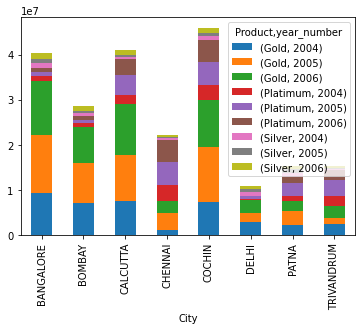

In [175]:
City_Data.plot(kind='bar',stacked=True)
plt.show()

Q4. Create graphs for

 a. Monthly comparison of total spends, city wise

In [180]:
Monthy_Spend=pd.pivot_table(data=customer_spend,index="City",columns=['month_number'],values='Amount',aggfunc='sum')

In [181]:
Monthy_Spend

month_number,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
BANGALORE,9041796.84,6734494.76,5362903.07,4207980.48,6383115.13,1330685.90,2228217.69,695061.95,703018.28,1091602.61,2260603.07,422167.24
BOMBAY,5948993.33,4276988.30,5227850.50,1873785.01,3891945.60,1172594.97,177726.32,1066744.75,1278402.79,676005.70,2872049.40,140040.71
CALCUTTA,9064864.90,8150545.61,4939040.04,3457507.95,5578246.87,2293045.81,2234573.27,1548354.02,1511713.57,196357.83,2078880.93,55001.50
CHENNAI,4466961.36,4385815.95,3183643.71,2518656.99,2856199.62,1244242.16,693825.77,305875.97,745759.40,156247.17,1347779.28,223628.27
COCHIN,11714373.54,5747886.38,5645146.53,3882744.94,6581085.69,2495745.07,1290897.30,2317306.61,1382242.90,868551.89,3127999.60,909533.05
DELHI,2714261.45,1494064.06,2267149.02,777240.75,1600322.07,511276.09,50001.50,155402.16,50001.00,64615.46,391610.96,842342.02
PATNA,4916205.55,2353333.55,1437166.61,2338179.53,2136586.80,746186.13,50000.00,419383.64,70329.95,329537.34,413677.87,50000.00
TRIVANDRUM,3704336.99,2857123.89,2392316.51,1199293.45,2813534.48,400336.83,260484.50,453773.94,186063.70,285581.92,143387.40,640922.26


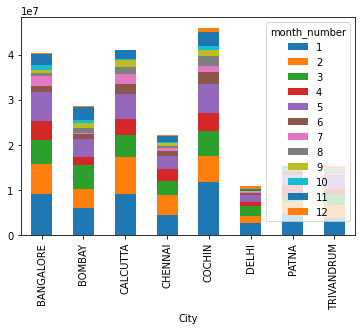

In [182]:
Monthy_Spend.plot(kind='bar',stacked=True)
plt.show()

b. Comparison of yearly spend on air tickets

In [183]:
Yearly_Spend=pd.pivot_table(data=customer_spend[customer_spend.Type=='AIR TICKET'],
                            index='Type',columns='year_number',
                            values='Amount',aggfunc='sum')

In [184]:
Yearly_Spend

year_number,2004,2005,2006
Type,,,
AIR TICKET,4357225.35,10550152.21,5248469.56


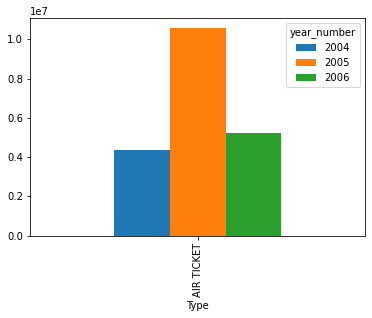

In [185]:
Yearly_Spend.plot(kind='bar')
plt.show()

c. Comparison of monthly spend for each product (look for any seasonality
 that exists in terms of spend

In [186]:
Monthy_Spend_Product=pd.pivot_table(data=customer_spend,
                            index='Product',columns='month_number',
                            values='Amount',aggfunc='sum')

In [187]:
Monthy_Spend_Product

month_number,1,2,3,4,5,6,7,8,9,10,11,12
Product,,,,,,,,,,,,
Gold,32413831.83,24779179.55,19256972.48,13170572.59,21548169.76,6538862.64,5167416.37,4954030.42,3816887.62,3018223.38,9203267.46,2332940.96
Platimum,14951578.51,9134054.58,7288837.68,5182493.86,8151926.49,2965712.71,1288156.26,1714762.80,1667840.84,550275.04,2741618.42,750156.19
Silver,4206383.62,2087018.37,3909405.83,1902322.65,2140940.01,689537.61,530153.72,293109.82,442803.13,100001.50,691102.63,200537.90


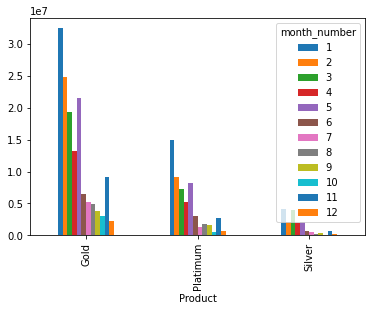

In [188]:
Monthy_Spend_Product.plot(kind='bar')
plt.show()

Q5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers

In [202]:
#changing date from object to date time
customer_repayment["Month"]=customer_repayment["Month"].apply(lambda x:pd.to_datetime(x))

In [203]:
customer_repayment["yearly"]=customer_repayment["Month"].apply(lambda x:x.year)
customer_repayment["monthly"]=customer_repayment["Month"].apply(lambda x:x.month)

In [204]:
customer_repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,month_number,yearly,monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,1,2004,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,1,2004,1
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,1,2004,1
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,1,2004,1
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,1,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00,1,2004,1
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00,1,2004,1
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00,1,2004,1
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00,1,2004,1


In [205]:
top_ten_customer=pd.pivot_table(data=customer_repayment,
                            index='Product',columns=['month_number','City'],
                            values='Amount',aggfunc='sum')

In [206]:
top_ten_customer

month_number          1                                                   \
City           BANGALORE      BOMBAY    CALCUTTA     CHENNAI      COCHIN   
Product                                                                    
Gold          8373392.04  5495004.58  6083577.48  1283196.53  6441125.96   
Platimum       873873.76   702094.48  1879101.51  1742122.21  3569499.60   
Silver        1328028.33   900000.00   533811.62   480193.34  1249892.55   

month_number                                              2               ...  \
City               DELHI       PATNA  TRIVANDRUM   BANGALORE      BOMBAY  ...   
Product                                                                   ...   
Gold          2758039.05  1976273.11  1034461.46  6399922.02  3307959.90  ...   
Platimum       140309.31   781731.00  1615123.57   659072.11   703918.51  ...   
Silver        1084643.62  1313626.32   500004.00  1080002.40   449817.89  ...   

month_number         11                    12                                  \
City              PATNA TRIVANDRUM  BANGALORE    BOMBAY   CALCUTTA    CHENNAI   
Product                                                                         
Gold          255915.07        NaN  388821.96  479227.3        NaN  136860.63   
Platimum      297365.80  725146.71  110003.00  110003.0  179788.15  654763.91   
Silver        200002.00  200002.00        NaN       NaN        NaN        NaN   

month_number                                              
City             COCHIN      DELHI      PATNA TRIVANDRUM  
Product                                                   
Gold          410935.52  292310.69  417177.67  451630.26  
Platimum      225721.14  100003.00        NaN  278687.47  
Silver        100001.00  127400.18        NaN  100001.00  

[3 rows x 93 columns]

In [207]:
customer_repayment.groupby(['City','Product','Customer','month_number'])[['Amount']].sum().head(10)

Amount
City      Product Customer month_number            
BANGALORE Gold    A1       1             2407806.29
                           2              781873.80
                           4              508949.16
                           7              297176.74
                           9              186427.50
                           11             571458.18
                  A13      1             2014186.98
                           2             2049808.15
                           3             1183569.05
                           4              494392.40

In [213]:
def top_10_customer(product_name,time_period):
    return customer_repayment.loc[(customer_repayment.Product==product_name)].groupby(['Customer','City','Product',time_period])[['Amount']].sum().sort_values('Amount',ascending=False).head(10)

In [214]:
product_name=str(input())
time_period=str(input())


Gold
yearly


In [215]:
top_10=top_10_customer(product_name,time_period)

In [216]:
top_10

,,,,Amount
Customer,City,Product,yearly,
A61,COCHIN,Gold,2005,4276860.55
A44,DELHI,Gold,2005,4165317.77
A45,COCHIN,Gold,2005,4042447.57
A43,BANGALORE,Gold,2005,4006956.60
A13,BANGALORE,Gold,2005,3757673.00
A61,COCHIN,Gold,2006,3744127.41
A60,CALCUTTA,Gold,2005,3742856.10
A13,BANGALORE,Gold,2006,3477314.89
A29,CALCUTTA,Gold,2006,3434298.00


Q2) From the above dataset create the following summaries:

e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 

(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 

– Monthly spend. Interest is earned only on positive profits and not on negative amounts

In [241]:
repayment

,Customer,Month,Amount,repayment_month_wise
0,A1,2004-01-12,495414.75,1
1,A1,2004-01-03,245899.02,1
2,A1,2004-01-15,259490.06,1
3,A1,2004-01-25,437555.12,1
4,A1,2005-01-17,165972.88,1
...,...,...,...,...
1495,A67,2005-05-09,55638.77,5
1496,A68,2006-05-10,319836.49,5
1497,A69,2006-07-11,247628.45,7
1498,A70,2005-08-12,454016.51,8


In [242]:
spend_repayment = pd.merge(left=spend,right=repayment,on="Customer")

In [243]:
spend_repayment

,Sl No:,Customer,Month_x,Type,Amount_x,spend_month_wise,Month_y,Amount_y,repayment_month_wise
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-12,495414.75,1
1,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-03,245899.02,1
2,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-15,259490.06,1
3,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-25,437555.12,1
4,1,A1,2004-01-12,JEWELLERY,485470.80,1,2005-01-17,165972.88,1
...,...,...,...,...,...,...,...,...,...
37279,349,A7,2006-04-19,JEWELLERY,165956.43,4,2005-11-22,55108.71,11
37280,349,A7,2006-04-19,JEWELLERY,165956.43,4,2005-12-03,429700.12,12
37281,349,A7,2006-04-19,JEWELLERY,165956.43,4,2005-02-23,344628.72,2
37282,349,A7,2006-04-19,JEWELLERY,165956.43,4,2006-03-31,336264.37,3


In [244]:

spend_repayment=spend_repayment.drop(columns=["Sl No:"])
spend_repayment

,Customer,Month_x,Type,Amount_x,spend_month_wise,Month_y,Amount_y,repayment_month_wise
0,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-12,495414.75,1
1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-03,245899.02,1
2,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-15,259490.06,1
3,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-25,437555.12,1
4,A1,2004-01-12,JEWELLERY,485470.80,1,2005-01-17,165972.88,1
...,...,...,...,...,...,...,...,...
37279,A7,2006-04-19,JEWELLERY,165956.43,4,2005-11-22,55108.71,11
37280,A7,2006-04-19,JEWELLERY,165956.43,4,2005-12-03,429700.12,12
37281,A7,2006-04-19,JEWELLERY,165956.43,4,2005-02-23,344628.72,2
37282,A7,2006-04-19,JEWELLERY,165956.43,4,2006-03-31,336264.37,3


In [245]:
#changing date from object to date time
repayment["Month"]=repayment["Month"].apply(lambda x:pd.to_datetime(x))
spend["Month"]=spend["Month"].apply(lambda x:pd.to_datetime(x))
spend["spend_month_wise"]=spend["Month"].apply(lambda x:x.month)
repayment["repayment_month_wise"]=repayment["Month"].apply(lambda x:x.month)

In [246]:
spend_repayment = pd.merge(left=spend,right=repayment,left_on=["Customer","spend_month_wise"],
                           right_on=["Customer","repayment_month_wise"])

In [247]:
spend_repayment=spend_repayment.drop(columns=["Sl No:"])

In [248]:
#spend_repayment.drop(["amount_per_month_x","amount_per_month_y"],axis=1,inplace=True)

In [249]:
spend_repayment["Profit"] = spend_repayment["Amount_y"] - spend_repayment["Amount_x"] 

In [250]:
spend_repayment

,Customer,Month_x,Type,Amount_x,spend_month_wise,Month_y,Amount_y,repayment_month_wise,Profit
0,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-12,495414.75,1,9943.95
1,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-03,245899.02,1,-239571.78
2,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-15,259490.06,1,-225980.74
3,A1,2004-01-12,JEWELLERY,485470.80,1,2004-01-25,437555.12,1,-47915.68
4,A1,2004-01-12,JEWELLERY,485470.80,1,2005-01-17,165972.88,1,-319497.92
...,...,...,...,...,...,...,...,...,...
5311,A44,2006-12-03,JEWELLERY,313591.17,12,2005-12-03,79696.21,12,-233894.96
5312,A53,2005-04-27,JEWELLERY,129641.87,4,2006-04-02,493590.96,4,363949.09
5313,A53,2005-04-27,JEWELLERY,129641.87,4,2006-04-01,269353.50,4,139711.63
5314,A53,2005-04-27,JEWELLERY,129641.87,4,2005-04-04,339645.86,4,210003.99


In [251]:
spend_repayment["Monthly_Profit"]=np.where(spend_repayment["Amount_y"] - spend_repayment["Amount_x"]>0,(spend_repayment["Profit"]*2.9)/100,np.nan)

In [253]:
spend_repayment.sort_values('Profit',ascending=False)

,Customer,Month_x,Type,Amount_x,spend_month_wise,Month_y,Amount_y,repayment_month_wise,Profit,Monthly_Profit
5267,A36,2006-04-03,BIKE,8391.95,4,2005-04-27,495838.08,4,487446.13,14135.93777
1868,A15,2004-01-25,CAMERA,3750.13,1,2004-01-12,487671.40,1,483921.27,14033.71683
452,A26,2006-05-06,CAR,6588.51,5,2006-05-03,489138.12,5,482549.61,13993.93869
5083,A60,2004-01-25,AIR TICKET,4977.49,1,2004-01-03,487241.12,1,482263.63,13985.64527
3381,A43,2005-02-01,SHOPPING,6445.55,2,2005-02-01,484212.27,2,477766.72,13855.23488
...,...,...,...,...,...,...,...,...,...,...
3335,A40,2005-02-23,MOVIE TICKET,490796.93,2,2005-02-23,9642.77,2,-481154.16,NaN
1337,A12,2004-01-03,RENTAL,497770.15,1,2005-01-17,13379.96,1,-484390.19,NaN
2930,A41,2006-03-25,SHOPPING,490167.49,3,2004-03-19,2083.26,3,-488084.23,NaN
3546,A41,2005-11-20,BIKE,488800.78,11,2004-11-23,55.86,11,-488744.92,NaN
